## Testing of Logistic Regression on Task B1

In [5]:
# Import libraries
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

#Load one image and its size will be used later
img = cv2.imread('../Datasets/cartoon_set/img/0.png',cv2.IMREAD_GRAYSCALE)

In [6]:
#Read the csv. file
df = pd.read_csv('../Datasets/cartoon_set/labels.csv',sep='\t')
#In this task, only the 'face_shape' column is useful
y = np.array(df['face_shape'])[:1000]

In [7]:
#Initialization of sample matrix X
X = np.zeros((10000,img.size//16))

# A abandoned way to crop and slice the image
#for i in range(10000):
#    img = cv2.imread('../Datasets/cartoon_set/img/{}.png'.format(i),cv2.IMREAD_GRAYSCALE)
#    img_compressed1 = img[img.shape[0]//2:,img.shape[1]//4:3*img.shape[1]//4]
#    img_Rcompressed = img_compressed1[np.arange(1,img_compressed1.shape[0]+1,2)]
#    img_compressed2 = img_Rcompressed[:,np.arange(1,img_compressed1.shape[1]+1,2)]
#    X[i,:] = img_compressed2.reshape(1,img_compressed2.size)
#   
#    X = np.zeros((10000,img.size//16))
    
#Read each image in the folder, crop out 1/16 of the image with left ear, and save as a row of X
for i in range(1000):
    img = cv2.imread('../Datasets/cartoon_set/img/{}.png'.format(i),cv2.IMREAD_GRAYSCALE)
    img_compressed1 = img[img.shape[0]//2:3*img.shape[0]//4,img.shape[1]//4:img.shape[1]//2] #Cropping process
    X[i,:] = img_compressed1.reshape(1,img_compressed1.size)

In [8]:
#Training-validation split in a ratio 3:1
x_train, x_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [9]:
#Define a Logistic Regression classifier which trains the model based on training set as well as maximal iterations
#and gives a prediction on the test set
def logRegrPredict(x_train, y_train,xtest, max_iter):
    # Create a Logistic Regression Model
    logreg = LogisticRegression(solver='lbfgs',max_iter=max_iter)
    # Fit the model
    logreg.fit(x_train, y_train)
    # Make a prediction
    y_pred= logreg.predict(xtest)
    return y_pred

In [ ]:
# Timer of training process
time_start = time.time()

#Initialization of accuracy list
accuracy = []

#Validation process of iterations
for i in range(10):
    # Make a prediction for every 100 iterations
    y_pred = logRegrPredict(x_train, y_train,x_test, (i+1)*100)
    # Calculate and store the validation accuracy
    accuracy.append(accuracy_score(y_test,y_pred))

time_end = time.time()
running_time = time_end-time_start
print(f'finish training! total running time: {running_time}s')

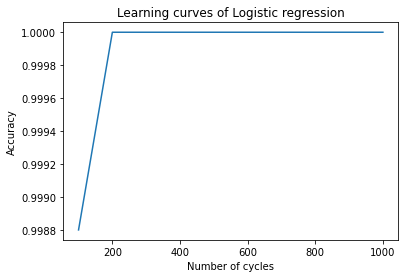

In [16]:
#Plot the learning curve
plt.title('Learning curves of Logistic regression')
plt.plot(np.linspace(100,1000,10),accuracy)
plt.xlabel('Number of cycles')
plt.ylabel('Accuracy')
plt.show()

In [10]:
# Timer for training process with 500 iterations
time_start = time.time()

y_pred = logRegrPredict(x_train, y_train,x_test, 500)

time_end = time.time()
running_time = time_end-time_start
print(f'finish training! total running time: {running_time}s')

finish training! total running time: 102.53880786895752s
